# Laboratory 03: Markovian Decision Process (MDP)

Step 01: Settings for MDP

In [1]:
import sys, os, mdp 

# transition of probabilities
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's2': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}

# rewards
rewards = {
    's1': {'a0': {'s0': 5}},
    's2': {'a1': {'s0': -1}}
}


In [2]:
from mdp import MDP

# define graph of markovian decision process
net = MDP(transition_probs, rewards, initial_state = 's0')

# check the initial state
print("Initial state = ", net.reset())

next_state, reward, done, info = net.step('a1')
print(f"Next_state = {next_state}")
print(f"Reward = {reward}")
print(f"Done = {done}")

Initial state =  s0
Next_state = s2
Reward = 0.0
Done = False


In [5]:
# check MDP functionalities and outputs

print(" --- MDP functionalities ---")
print("All states S = ", net.get_all_states())
print("Possible actions for s1 = ", net.get_possible_actions('s1'))
print("Get next state for s1 taking action a0 = ", net.get_next_states('s1', 'a0'))
print("Get reward for transition between state s1 to s0 taking action a0 = ", 
        net.get_reward('s1', 'a0', 's0'))
print("Get transition of probability between state s1 to s0 taking action a0 = ",
        net.get_transition_prob('s1', 'a0', 's0'))


 --- MDP functionalities ---
All states S =  ('s0', 's1', 's2')
Possible actions for s1 =  ('a0', 'a1')
Get next state for s1 taking action a0 =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
Get reward for transition between state s1 to s0 taking action a0 =  5
Get transition of probability between state s1 to s0 taking action a0 =  0.7


Step 02: Graph visualization of MDP

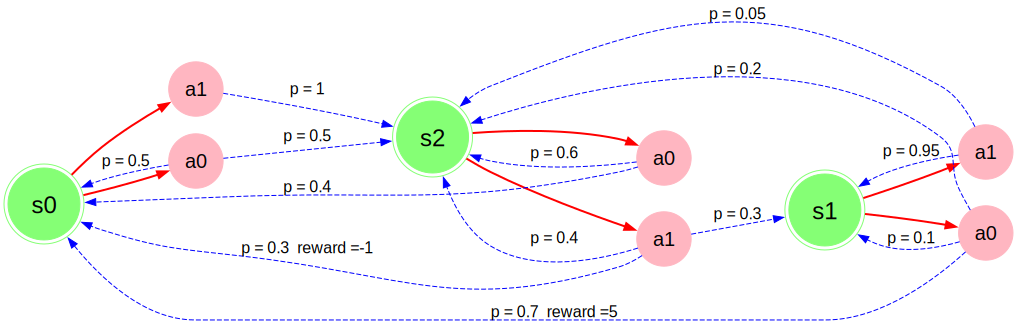

In [4]:
# graphic visualization 

from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, \
                    plot_graph_optimal_strategy_and_state_values
    display(plot_graph(net))


Step 03: Algorithm of Value Iterations (VI)  
  
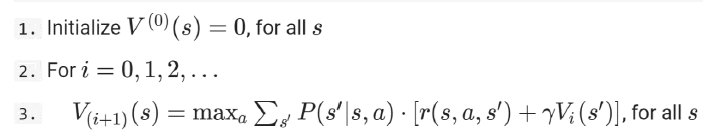

Compute function action-value Qi(s,a):  
  
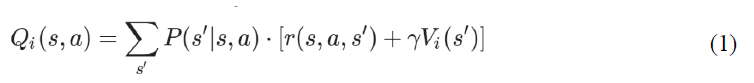

In [ ]:
# calculate Q(s,a) using the next formula:
# Qi(s,a) = sum{s'}{P(s'|s,a) * [r(s,a,s') + gamma * Vi(s')]}

import numpy as np 

def get_action_value(net, state_values, state, action, gamma):
    
    return

In [6]:
net.get_next_states('s1', 'a0')

{'s0': 0.7, 's1': 0.1, 's2': 0.2}